## Simulation und Modellierung WS16/17 - Uebung 05

### Aufgabe 1 : verallgemeinerte Fibonacci Zahlen

Schreiben Sie eine Funktion `AllgFib(F0=1,F1=1,a=1,b=1,N=3)`, welche die ersten `N` Folgeglieder der verallgemeinerten Fibonaccifolge

$$
    F_{n+1} = a F_n + b F_{n-1}
$$

mit den Anfangsbedingungen $F_0=$ `F0` und $F_1=$ `F1` berechnet und als Liste ausgibt. (Achtung : Die Definition in der Vorlesung war etwas anders)

Schreiben Sie eine Funktion `my_sqrt(x)`, welche mit Hilfe der verallgemeinerten Fibonacci Zahlen die Wurzel aus `x` bis auf Maschinengenauigkeit ausrechnet. Berechnen Sie $\sqrt{2}$ mit dieser Funktion. 

*Hinweis :* Iterieren Sie die Fibonacci Folge schrittweise bis sich das Verhaeltnis aufeinanderfolgender Zahlen nicht mehr aendert.

In [77]:
def AllgFib(F0=1,F1=1,a=1,b=1,N=3):
    F_n = F1
    F_me = F0
    print(F0)
    print(F1)
    for i in range(1,N):
        F = a*F_n + b*F_me
        print(F)
        F_me = F_n
        F_n = F       
    
AllgFib(N=10)

1
1
2
3
5
8
13
21
34
55
89


In [76]:
def AllgFib(F0=1,F1=1,a=1,b=1,N=3):
    F_n = F1
    F_me = F0
    old_ratio = 0 # cache for last reached ratio
    
    while abs(old_ratio-(F_n / F_me)) > 2**-53: # while difference of ratios is bigger than machine precision
        old_ratio = F_n / F_me
        F = a*F_n + b*F_me
        F_me = F_n
        F_n = F
        
    return F_n / F_me 

#-----------------------------------------------------------

my_sqrt = lambda x : AllgFib(a=2,b=x-1)-1

my_sqrt(2)



1.414213562373095

### Aufgabe 2 : Collatz-Problem

Wir betrachten die folgende Abbildung ueber den *positiven* natuerlichen Zahlen

$$
    f(n) = \left\lbrace \begin{array}{ll}
                            {}n/2 \qquad &,\textrm{falls }n\textrm{ gerade} \\
                            3n+1\qquad &,\textrm{falls }n\textrm{ ungerade}
                        \end{array}
           \right.
$$

sowie die natuerliche Zahl $\tau(n)$ welche angibt, wie of $f$ iteriert werden muss, bis man die Zahl 1 erreicht, d.h.

$$
    \left(f\circ\right)^{\tau(n)}(n) = 1
$$

Schreiben Sie eine Funktion `tau(n)`, welche diese Zahl berechnet. Berechnen Sie eine Liste `L` der Werte $\tau(n)$ fuer die ersten `2**20` positiven natuerlichen Zahlen und plotten diese mit

```python
    from pylab import *
    plot(L,'.') # nur Punkte setzen, ohne diese zu verbinden
    show()
```

<a href="https://en.wikipedia.org/wiki/Collatz_conjecture">Collatz-Problem @ Wikipedia</a><br>
Collatz-Problem @ xkcd : <img src="http://imgs.xkcd.com/comics/collatz_conjecture.png">

In [124]:
from pylab import *
import time

def tau(n):
    count = 0
    while 1:
        if not (n % 2):
            n *= 0.5 # n*0.5 is ~2.5% faster than n/2
            count += 1
        else:
            if n == 1: # could use n!=1 as statement in while loop at the beginning, but its faster to check for n==1 only when n is odd 
                break
            n = (n*3) + 1
            count += 1
    return count

print(tau(1))

0


99 Werte in 0.0 Sekunden berechnet.


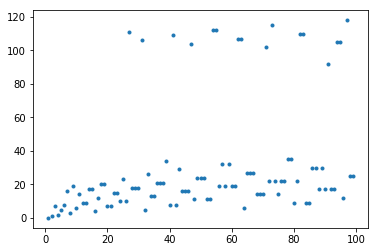

In [168]:
from pylab import *
import time

d = dict() # lookup table with already solved numbers and iterations 

Lx = list()
Ly = list()

start = time.time()

for i in range(1,100):
    n = i
    count = 0
    while 1:
        if n in d: # if in dictionary then get iterations from this point and add to count
            count += d[n]
            break
        if not (n % 2): # faster than n%2==0
            n *= 0.5 # n*0.5 is ~2.5% faster than n/2
            count += 1
        else:
            if n == 1: # could use n!=1 as statement in while loop at the beginning, but its faster to check for n==1 only when n is odd 
                break
            n = (n*3) + 1
            count += 1

    d.update({i:count}) # add number and iterations-count to lookup table
    
end = time.time()

print(len(d),"Werte in",round(end-start,2),"Sekunden berechnet.") 

for key in d:
    Lx.append(key)
    Ly.append(d[key])
   
plot(Lx, Ly ,'.') # nur Punkte setzen, ohne diese zu verbinden
show()